In [1]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
result_dir = os.path.join(os.path.dirname(os.getcwd()), 'result', 'gnk')
figure_dir = os.path.join(os.path.dirname(os.getcwd()), 'figure')

import seaborn as sns
import numpy as np
import matplotlib

plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

In [2]:
def plot_loss(loss_array, start:int = 0, end: int = None):
    """
    Input:
        loss_array: (epoch, 11) array. loss, ell_0, ell_1, ell_2, norm0, norm1, norm2, cos01, cos02, cos12
    """

    title_list = [r'$\ell_{M}$', r'$h_0$', r'$\bar{f}^{1, +}$', r'$\bar{f}^{1, -}$']

    if end is None:
        x_axis = range(start, loss_array.shape[0])
    else:
        x_axis = range(start, end)

    fig, axes = plt.subplots(1, 4, figsize=(13, 2.5))
    axes = axes.flatten()

    for i in range(len(title_list)):
       axes[i].plot(x_axis, loss_array[start:end, i], label=title_list[i])
       axes[i].set_title(title_list[i], fontsize = 20)
       axes[i].spines['top'].set_visible(False)
       axes[i].spines['right'].set_visible(False)
       axes[i].spines['top'].set_visible(False)
       axes[i].spines['right'].set_visible(False)
       axes[i].set_xlabel('Epoch')
       if i == 3:
          axes[i].set_ylim(-2.5, 0)

       elif i ==0:
          axes[i].set_ylim(-1, 1.8)

       elif i == 1:
          axes[i].set_ylim(0, 1.5)

       else:
           axes[i].set_ylim(-1, 1.5)

    fig.tight_layout()

    return fig

In [6]:
loss = np.load(os.path.join(result_dir, 'gnk_nle_mlmc_n_1000_100_gradient_inspect_loss.npy'))

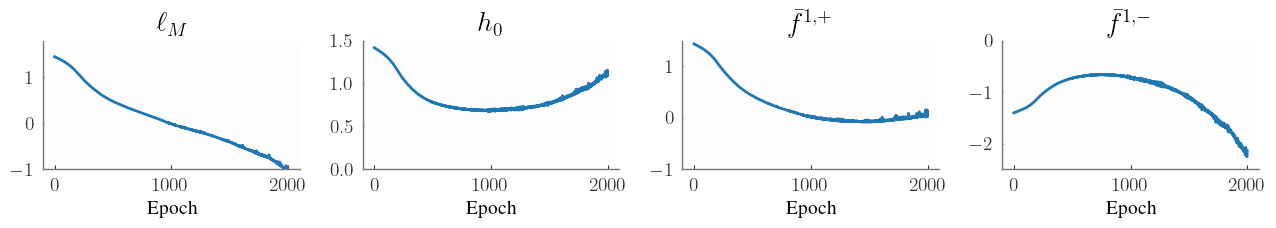

In [9]:
loss_to_plot_old = loss[:, 0:4]
f = plot_loss(loss_to_plot_old)

In [151]:
f.savefig(os.path.join(figure_dir, 'loss_old_gnk.pdf'), bbox_inches = 'tight')

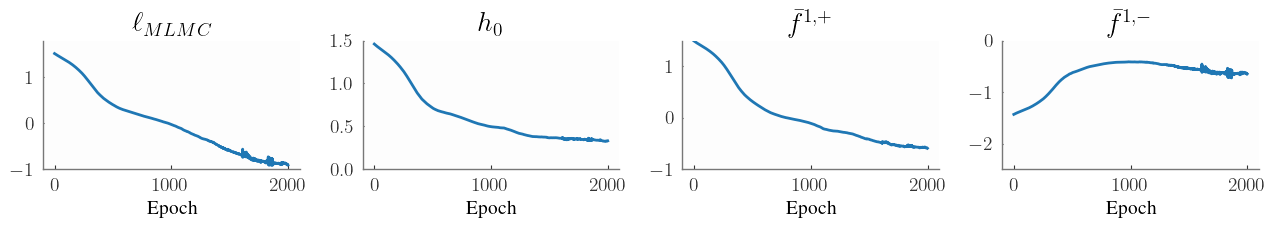

In [152]:
loss_new = np.load(os.path.join(result_dir, 'gnk_nle_mlmc_n_1000_100_loss.npy'))
loss_to_plot_new = loss_new[:, 0:4]
f_new = plot_loss(loss_to_plot_new)

In [153]:
f_new.savefig(os.path.join(figure_dir, 'loss_new_gnk.pdf'), bbox_inches = 'tight')